<a href="https://colab.research.google.com/github/rafakt312/Taller-de-Ciencia-de-datos-Taller1/blob/main/mHealth_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Análisis Exploratorio del Dataset MHEALTH

Este notebook corresponde al **primer producto computacional** del curso.  
El objetivo es realizar un **análisis exploratorio de datos (EDA)** sobre el dataset **MHEALTH**, incluyendo carga, exploración, limpieza y documentación.

## <a id="section1"></a> 1. Importación de librerías
```python
# pandas y numpy: esenciales para manejar y analizar datos.
# matplotlib y seaborn: herramientas para crear gráficos que ayudan a visualizar patrones.
# StandardScaler: se utilizará más adelante para normalizar variables numéricas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid", palette="muted")


## 2. Carga del dataset

In [7]:
# Descarga del dataset MHEALTH desde UCI Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip"
# Descargamos el dataset y lo guardamos como archivo comprimido "mhealth.zip"
!wget {url} -O mhealth.zip
# Descomprimimos el archivo zip dentro de la carpeta "mhealth"
!unzip -q mhealth.zip -d mhealth

# Exploramos los archivos descargados
import os
os.listdir("mhealth")[:5]

--2025-09-04 02:13:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘mhealth.zip’

mhealth.zip             [               <=>  ]  72.07M  20.2MB/s    in 4.7s    

2025-09-04 02:13:46 (15.3 MB/s) - ‘mhealth.zip’ saved [75567983]

replace mhealth/MHEALTHDATASET/mHealth_subject1.log? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
replace mhealth/MHEALTHDATASET/mHealth_subject10.log? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace mhealth/MHEALTHDATASET/mHealth_subject2.log? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


['MHEALTHDATASET']

## 3. Exploración inicial de los datos

In [17]:
# Mostramos la cantidad de filas y columnas del dataset
print("Dimensiones:", df.shape)
# Información general: tipos de datos, cantidad de valores no nulos por columna
df.info()
# Muestra si alguna columna tiene valores nulos
df.isnull().sum()
# Estadísticas descriptivas de cada variable (transpuesta para visualizar mejor)
df.describe().T

Dimensiones: (161280, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161280 entries, 0 to 161279
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       161280 non-null  float64
 1   1       161280 non-null  float64
 2   2       161280 non-null  float64
 3   3       161280 non-null  float64
 4   4       161280 non-null  float64
 5   5       161280 non-null  float64
 6   6       161280 non-null  float64
 7   7       161280 non-null  float64
 8   8       161280 non-null  float64
 9   9       161280 non-null  float64
 10  10      161280 non-null  float64
 11  11      161280 non-null  float64
 12  12      161280 non-null  float64
 13  13      161280 non-null  float64
 14  14      161280 non-null  float64
 15  15      161280 non-null  float64
 16  16      161280 non-null  float64
 17  17      161280 non-null  float64
 18  18      161280 non-null  float64
 19  19      161280 non-null  float64
 20  20      161280 non-nul

,count,mean,std,min,25%,50%,75%,max
0,161280.0,-8.737671,3.806288,-22.3030,-9.832900,-9.330700,-8.020800,18.9600
1,161280.0,0.186275,1.453274,-17.4300,-0.380692,0.252830,0.770090,20.7130
2,161280.0,-0.645707,3.740042,-17.9060,-2.824350,-0.316040,1.665425,24.0840
3,161280.0,-0.007960,0.504334,-7.3218,-0.188380,-0.025118,0.154890,5.4505
4,161280.0,-0.035226,0.643813,-8.6196,-0.205130,-0.025118,0.163270,8.5191
5,161280.0,1.229914,4.671081,-22.0750,0.095848,1.785900,2.643100,20.0540
6,161280.0,-9.667029,4.064311,-19.6190,-10.066000,-9.570500,-9.025600,21.1610
7,161280.0,-1.650613,5.030605,-19.3730,-3.288900,-0.711750,0.649125,25.0150
8,161280.0,0.010649,0.495378,-1.5492,-0.372910,-0.161410,0.500930,1.8701
9,161280.0,-0.663745,0.322115,-2.1895,-0.848030,-0.741090,-0.596620,1.5253


## 4. Análisis estadístico y visualizaciones

### Comparación de ECG lead 1 del Sujeto 1
En este gráfico se muestran las primeras 60 muestras del **ECG lead 1** para tres actividades del sujeto 1:  
- **Standing still (L1)**  
- **Walking (L4)**  
- **Running (L11)**  

> Nota: Aunque se usan 60 muestras como ejemplo visual, **no representan literalmente 1 minuto de actividad**, ya que la frecuencia de muestreo del dataset es mayor a 1 Hz. Este gráfico sirve para observar patrones y diferencias entre las señales durante cada actividad.


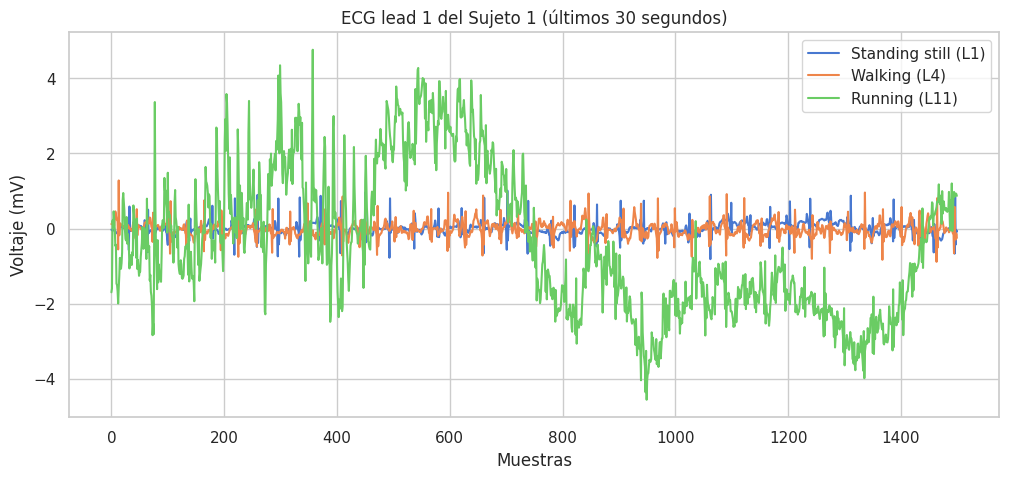

In [35]:
import matplotlib.pyplot as plt

# Número de muestras para 30 segundos
muestras = 50 * 30  # 50 Hz * 30 s = 1500 muestras

# Filtrar actividades del sujeto 1
df_suj1_L1 = df[df[23] == 1]    # L1: Standing
df_suj1_L4 = df[df[23] == 4]    # L4: Walking
df_suj1_L11 = df[df[23] == 11]  # L11: Running

# Tomar las últimas 1500 muestras
ecg_L1 = df_suj1_L1[3].values[-muestras:]
ecg_L4 = df_suj1_L4[3].values[-muestras:]
ecg_L11 = df_suj1_L11[3].values[-muestras:]

plt.figure(figsize=(12,5))

# Graficar cada actividad
plt.plot(range(muestras), ecg_L1, label='Standing still (L1)')
plt.plot(range(muestras), ecg_L4, label='Walking (L4)')
plt.plot(range(muestras), ecg_L11, label='Running (L11)')

plt.title('ECG lead 1 del Sujeto 1 (últimos 30 segundos)')
plt.xlabel('Muestras')
plt.ylabel('Voltaje (mV)')
plt.legend()
plt.show()






### Giroscopio tobillo izquierdo X axis del Sujeto 10 (último minuto)

Este gráfico muestra **1 minuto completo** de la señal del **giroscopio del tobillo izquierdo (X axis)** del **sujeto 10** durante tres actividades:  

- **Sitting and relaxing (L2)**  
- **Climbing stairs (L5)**  
- **Cycling (L9)**  

> Nota: Cada actividad se muestra usando **3000 muestras**, correspondientes a 1 minuto de registro continuo (frecuencia de muestreo = 50 Hz).  
> Esto permite comparar visualmente la velocidad angular del tobillo izquierdo durante distintas actividades a lo largo de un minuto completo.



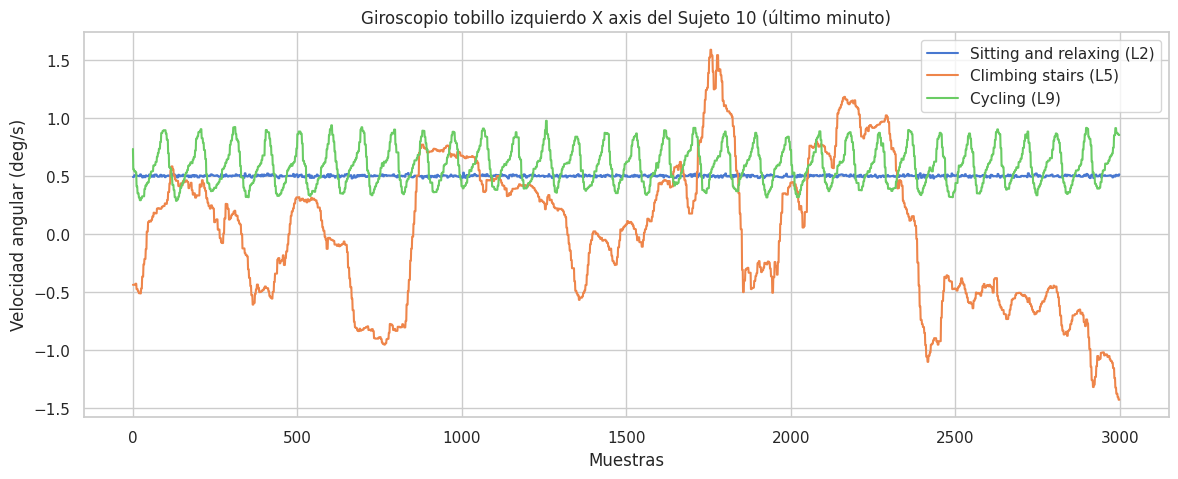

In [37]:
import matplotlib.pyplot as plt

# Número de muestras para 1 minuto
muestras = 50 * 60  # 50 Hz * 60 s = 3000 muestras

# Filtrar actividades del sujeto 10
df_suj10_L2 = df[df[23] == 2]    # Sitting and relaxing
df_suj10_L5 = df[df[23] == 5]    # Climbing stairs
df_suj10_L9 = df[df[23] == 9]    # Cycling

# Tomar las últimas 3000 muestras (último minuto)
gyro_L2 = df_suj10_L2[8].values[-muestras:]
gyro_L5 = df_suj10_L5[8].values[-muestras:]
gyro_L9 = df_suj10_L9[8].values[-muestras:]

plt.figure(figsize=(14,5))

plt.plot(range(muestras), gyro_L2, label='Sitting and relaxing (L2)')
plt.plot(range(muestras), gyro_L5, label='Climbing stairs (L5)')
plt.plot(range(muestras), gyro_L9, label='Cycling (L9)')

plt.title('Giroscopio tobillo izquierdo X axis del Sujeto 10 (último minuto)')
plt.xlabel('Muestras')
plt.ylabel('Velocidad angular (deg/s)')
plt.legend()
plt.show()



## 5. Limpieza y preprocesamiento

In [11]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])  # todas menos la última columna
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled.head()


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.283933,-0.121315,0.251692,0.024083,0.061217,0.204447,-0.007300,0.453502,0.188242,-0.548828,...,0.036543,-1.035982,0.046912,-0.548772,-0.090508,-1.069714,-0.516942,-0.107280,-0.066985,0.003201
1,-0.291946,0.232418,0.272508,0.024083,0.080724,0.247842,0.039128,0.464061,0.150782,-0.542991,...,0.044213,-1.030793,0.087945,-0.594112,-0.090508,-1.069714,-0.516942,-0.100228,-0.044431,0.008915
2,-0.242370,-0.003045,0.289604,0.048985,0.113237,0.252338,0.024513,0.463513,0.150782,-0.542991,...,0.040302,-1.002526,0.094712,-0.524478,-0.090508,-1.069714,-0.516942,-0.079625,-0.022209,0.003204
3,-0.239875,0.019229,0.236906,0.173496,0.236787,0.203698,0.058295,0.437508,0.150782,-0.542991,...,0.044016,-1.030885,0.088501,-0.499124,-0.106757,-1.066519,-0.532990,-0.059222,-0.016861,-0.002422
4,-0.253615,0.080931,0.255952,0.455710,0.373333,0.254200,0.068432,0.469447,0.150782,-0.542991,...,0.040501,-1.047776,0.115570,-0.488140,-0.106757,-1.066519,-0.532990,-0.038825,-0.011624,-0.013818
